In [1]:
!pip install pandas scikit-learn nltk matplotlib


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [3]:
train_df = pd.read_csv("training.csv")
val_df = pd.read_csv("validation.csv")
test_df = pd.read_csv("test.csv")

train_df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [4]:
print("Total training samples:", len(train_df))
print("Unique labels:", train_df['label'].unique())
print("Label counts:\n", train_df['label'].value_counts())


Total training samples: 16000
Unique labels: [0 3 2 5 4 1]
Label counts:
 label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64


In [5]:
# Remove empty and null text rows
train_df = train_df.dropna(subset=['text'])
val_df = val_df.dropna(subset=['text'])
test_df = test_df.dropna(subset=['text'])

In [7]:

# Reset index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
print("Cleaned!")

Cleaned!


In [8]:
import re
import nltk
from nltk.corpus import stopwords

In [9]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # remove stopwords
    return text

train_df['clean_text'] = train_df['text'].apply(clean_text)
val_df['clean_text'] = val_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

train_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,text,label,clean_text
0,i didnt feel humiliated,0,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,3,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,3,feeling grouchy


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X_train = vectorizer.fit_transform(train_df['clean_text'])
X_val = vectorizer.transform(val_df['clean_text'])
X_test = vectorizer.transform(test_df['clean_text'])

y_train = train_df['label']
y_val = val_df['label']
y_test = test_df['label']

X_train.shape, X_val.shape, X_test.shape

((16000, 5000), (2000, 5000), (2000, 5000))

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

print("Model training complete ✅")


Model training complete ✅


In [16]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.8775

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       550
           1       0.87      0.95      0.91       704
           2       0.89      0.73      0.80       178
           3       0.90      0.84      0.87       275
           4       0.85      0.77      0.81       212
           5       0.86      0.62      0.72        81

    accuracy                           0.88      2000
   macro avg       0.88      0.81      0.84      2000
weighted avg       0.88      0.88      0.87      2000



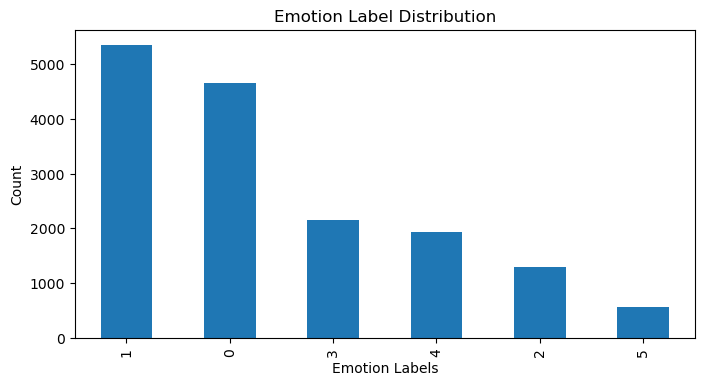

In [23]:
import matplotlib.pyplot as plt

train_df['label'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title("Emotion Label Distribution")
plt.xlabel("Emotion Labels")
plt.ylabel("Count")
plt.show()


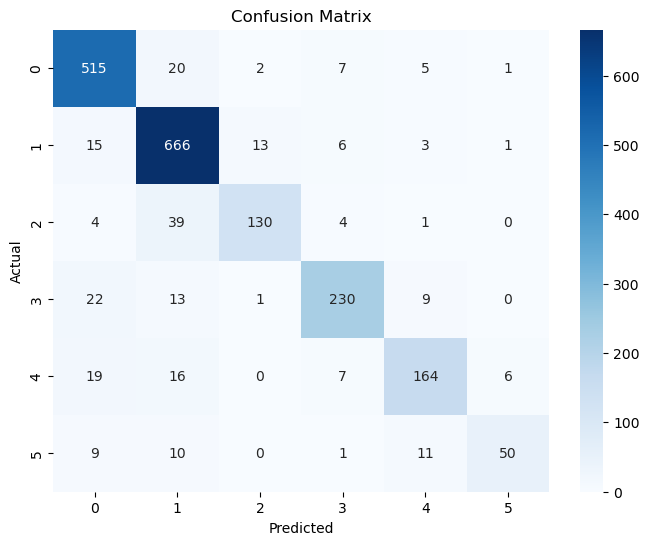

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


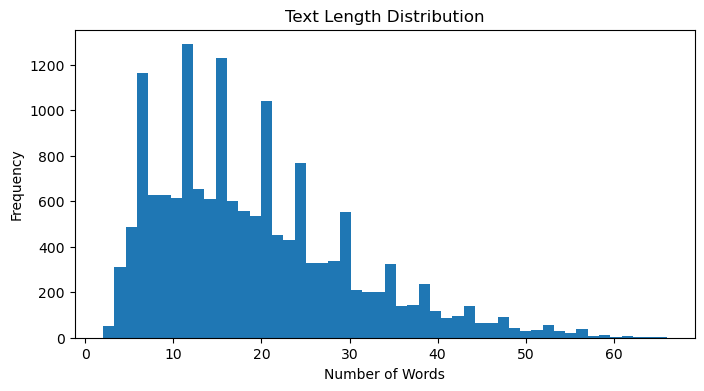

In [24]:
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))

train_df['text_length'].plot(kind='hist', bins=50, figsize=(8,4))
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.show()


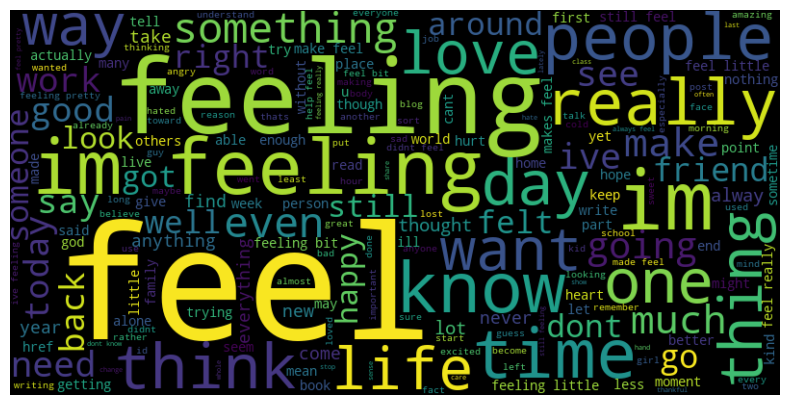

In [22]:
from wordcloud import WordCloud
text_combined = ' '.join(train_df['clean_text'])
wc = WordCloud(width=800, height=400).generate(text_combined)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [26]:
from sklearn.metrics import accuracy_score, classification_report

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.8775

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       550
           1       0.87      0.95      0.91       704
           2       0.89      0.73      0.80       178
           3       0.90      0.84      0.87       275
           4       0.85      0.77      0.81       212
           5       0.86      0.62      0.72        81

    accuracy                           0.88      2000
   macro avg       0.88      0.81      0.84      2000
weighted avg       0.88      0.88      0.87      2000



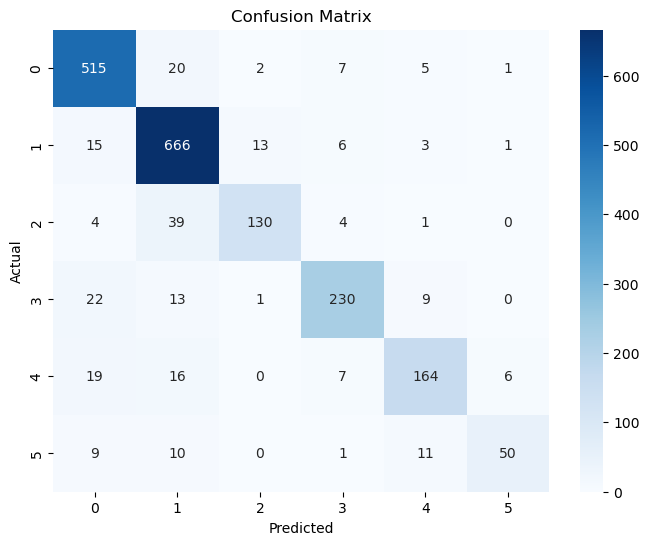

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


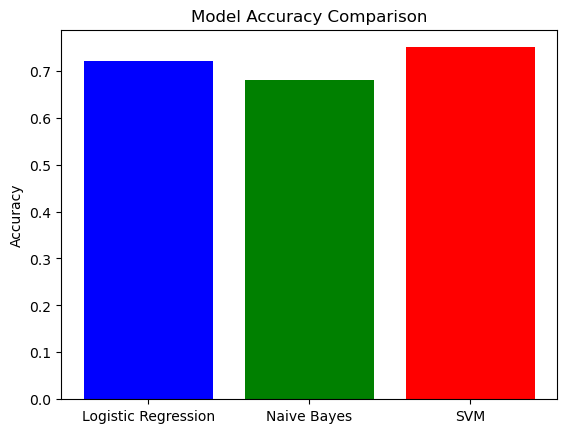

In [28]:
models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [0.72, 0.68, 0.75]  # example values

plt.bar(models, accuracies, color=['blue','green','red'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [29]:
import pickle

# Save the trained model
with open("emotion_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("Model & Vectorizer saved successfully ✅")


Model & Vectorizer saved successfully ✅
